# Análise dos dados dos senadores brasileiros

In [1]:
%%html
                                  
<script>
code_show = true; 
function code_display() {
    if (code_show) {
        $('div.input').each(function(id) {
            if (id == 0 || $(this).html().indexOf('hide_code') > -1) {$(this).hide();}
        });
        $('div.output_prompt').css('opacity', 0);
    } else {
        $('div.input').each(function(id) {$(this).show();});
        $('div.output_prompt').css('opacity', 1);
    };
    code_show = !code_show;
} 
$(document).ready(code_display);
</script>
                                      
<form action="javascript: code_display()">
<input style="color: #0f0c0c; background: LightGray; opacity: 0.8;" \ 
type="submit" value="Click to display or hide code cells">
</form>

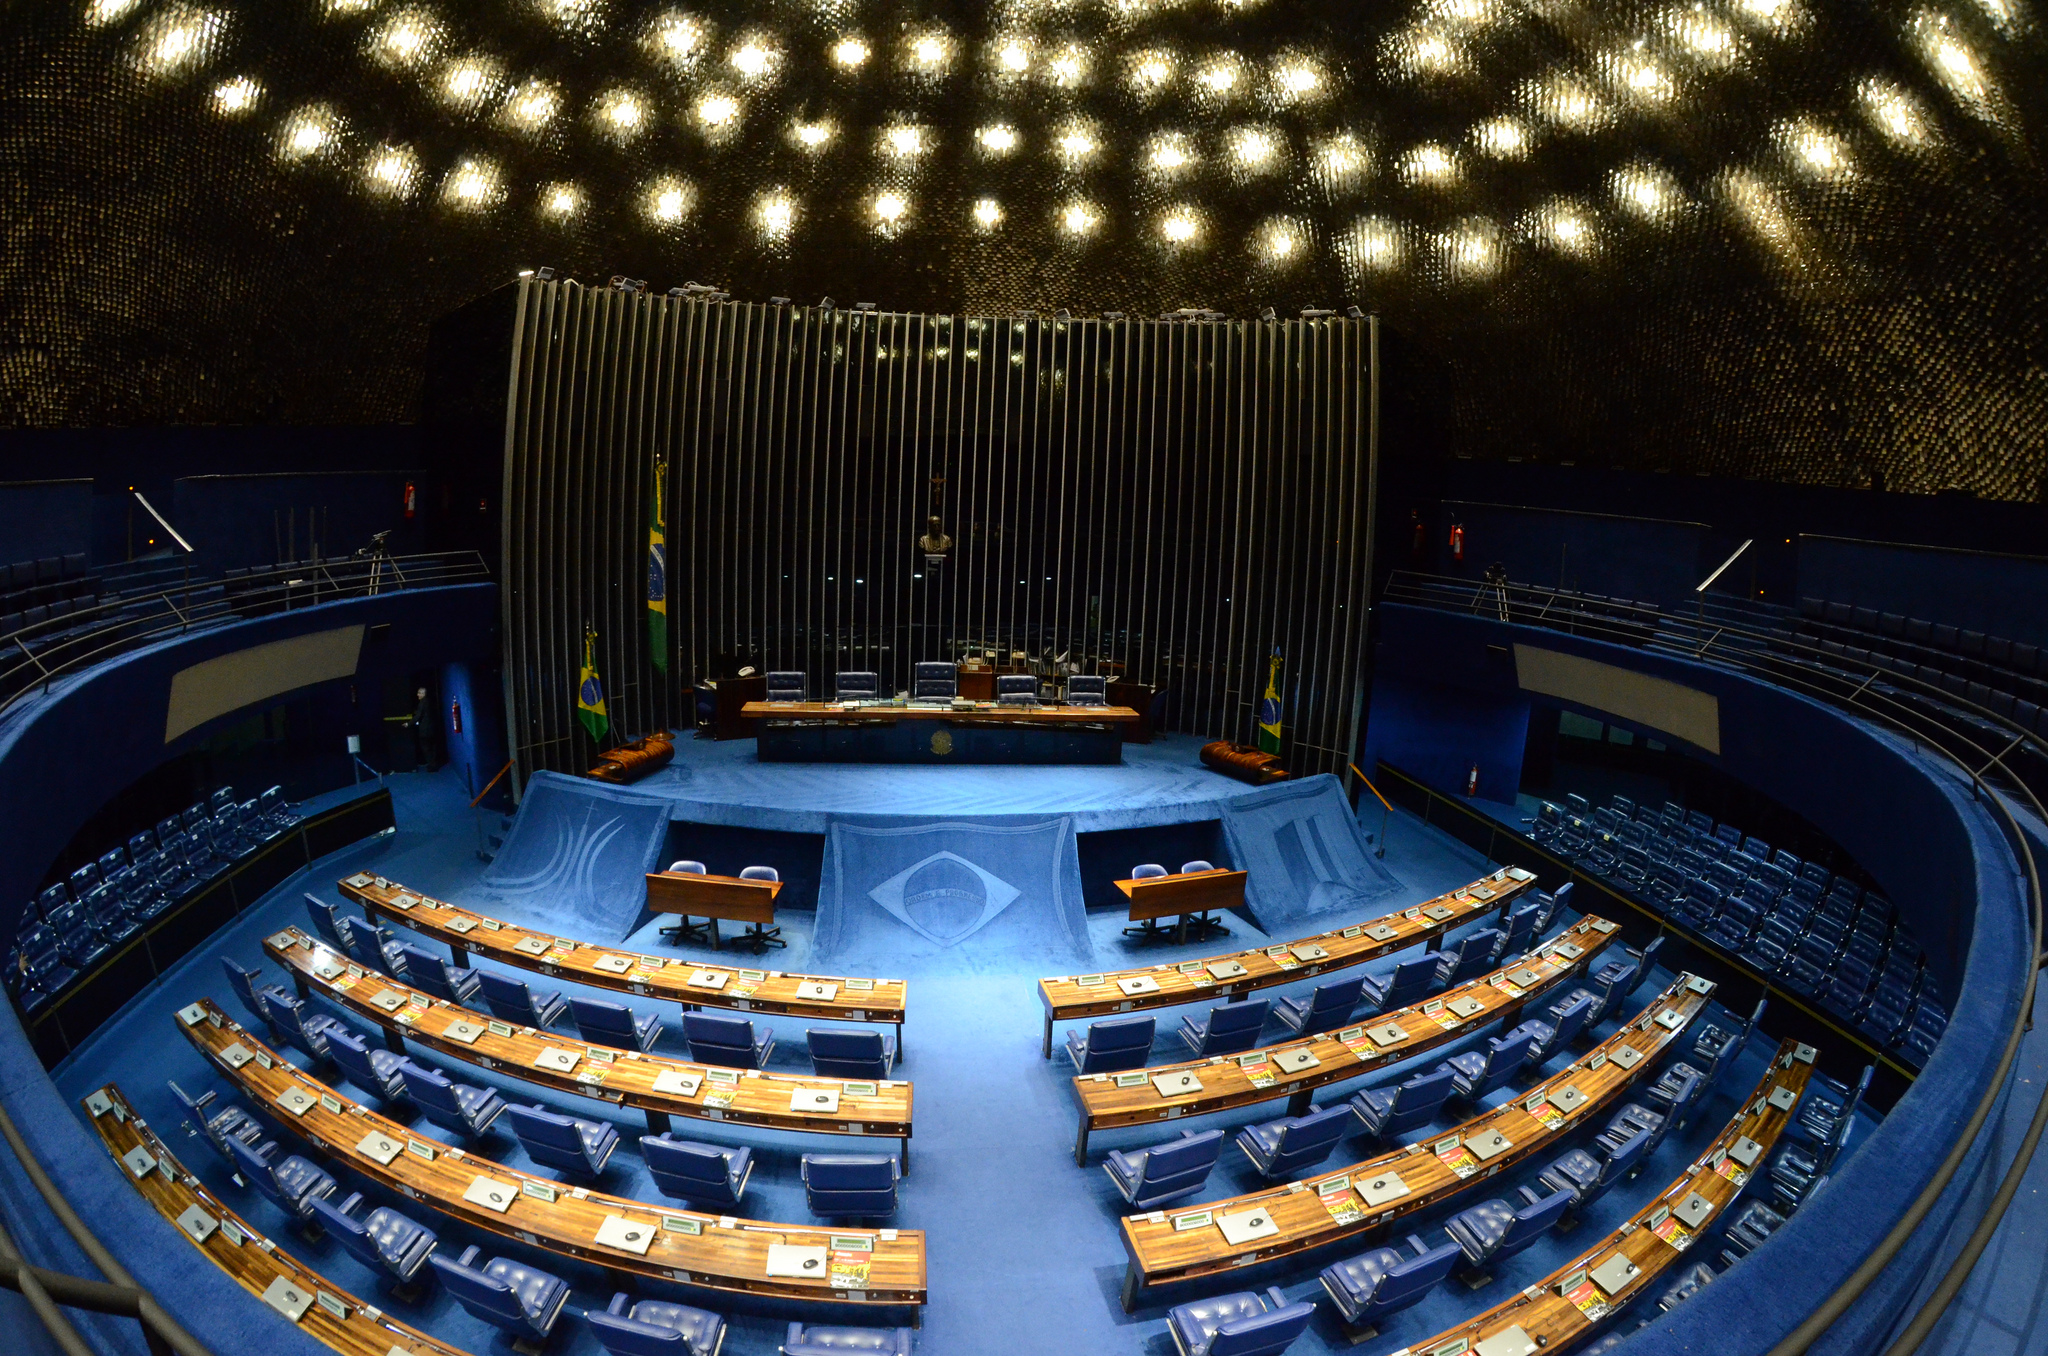

In [3]:
Image(filename='reports/senado.jpg',width='80%', height='80%')

## 1 step: Prepare environment
- Imports
- Prepare Principal Directory
- Prepare Environment
- Cell Format

### Imports

In [63]:
# Data analysis and data wrangling
import numpy as np
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # analise de variáveis vazia
from IPython.display import Image

# Other
import time
import os
import subprocess
import warnings

### Prepare Principal Directory

In [4]:
def exit_current_directory():
    # Actual PATH
    path = os.getcwd()
    print('Current working directory:\n{}\n'.format(path))

    os.chdir('..')
    print('Change directory to:\n{}\n'.format(os.getcwd()))
    
exit_current_directory()

Current working directory:
/home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores/notebooks

Change directory to:
/home/campos/projetos/artificial_inteligence/projects/analise_despesas_senadores



### Prepare Environment

In [11]:
# from <package>.<module> import <class>
from src.prepare_environment import *


main()


Requirements this project:

seaborn==0.8.1
pandas==0.23.0
matplotlib==2.2.2
missingno==0.4.1
numpy==1.14.3
ipython==7.4.0
atlas==0.27.0

--------------------------------------------------
Configuration Environment:

SO:
Linux
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.2 LTS
Release:	18.04
Codename:	bionic

Pip Version:
pip 10.0.1 from /home/campos/anaconda3/lib/python3.6/site-packages/pip (python 3.6)

Conda Version:
conda 4.6.8

Jupyter Version:
4.4.0

--------------------------------------------------
Structure this project:
.
├── config_environment.txt
├── data
│   ├── dados_limpos_ceaps_processed.csv
│   ├── gastos2008.csv
│   ├── gastos2009.csv
│   ├── gastos2010.csv
│   ├── gastos2011.csv
│   ├── gastos2012.csv
│   ├── gastos2013.csv
│   ├── gastos2014.csv
│   ├── gastos2015.csv
│   ├── gastos2016.csv
│   ├── gastos2017.csv
│   ├── gastos2018.csv
│   └── gastos2019.csv
├── notebooks
│   ├── CEAPS-2016-part01.ipynb
│   └── CEAPS-2016-part02.ipynb
├── readme.md
├── repo

### Cell Format

In [14]:
# Guarantees visualization inside the jupyter
%matplotlib inline

# formata os dados de todas as tabelas (ponto flutuante com 2 casas)
pd.options.display.float_format = '{:.2f}'.format

# parametros de config
rc={'savefig.dpi': 75, 
    'figure.autolayout': False, 
    'figure.figsize': [12, 8], 
    'axes.labelsize': 18,
    'axes.titlesize': 18, 
    'font.size': 18, 
    'lines.linewidth': 2.0, 
    'lines.markersize': 8, 
    'legend.fontsize': 16,
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

# Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Definition color and map de colors
default_color = '#56B4E9'
colormap = plt.cm.cool

# Supress unnecessary warnings so that presentation looks clean
warnings.filterwarnings('ignore')

# graph style
sns.set(style='dark',rc=rc)

## 3 step: Data Acquisition
- **Fonte:**
portal da transparência: https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps
- **Ano**: 2016
- **Format**: CSV

In [59]:
# Site to get csv
url = 'https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps'

In [60]:
# from <package>.<module> import <class>
from src.dump_data import *

In [ ]:
dump_file_csv(url)

### Load dataset

In [58]:
%%time

df = pd.read_csv('data/gastos2016.csv', 
                  encoding='latin1',
                  delimiter=';', 
                  verbose=True)

Tokenization took: 21.36 ms
Type conversion took: 55.86 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 128 ms, sys: 8.2 ms, total: 136 ms
Wall time: 140 ms


## 3 step: Questions
- Qual o senador que mais gastou ?
- Qual o senador que mais pediu reembolso?
- Reembolsos menores que  R$ 1,00
- Gráfico comparando a quantidade gasta por cada senador

## 4 step: Data Analysis

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26689 entries, (ANO, MES, SENADOR, TIPO_DESPESA, CNPJ_CPF, FORNECEDOR, DOCUMENTO, DATA) to (2016, 12, ZEZÉ PERRELLA, Passagens aéreas, aquáticas e terrestres nacionais, 21.443.582/0001-50, Pronto Produção de Eventos e Turismo Ltda, ZDS6KY, 12/12/2016)
Data columns (total 2 columns):
ULTIMA ATUALIZACAO    21309 non-null object
11/03/2019 04:01      26689 non-null object
dtypes: object(2)
memory usage: 974.5+ KB


Há um problema na geração dos dados. Neste caso, com `head()` é possível identificar como esta formatado.

In [82]:
df.head()

ULTIMA ATUALIZACAO  \
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                       DOCUMENTO DATA                                             DETALHAMENTO   
2016 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA 000011328 13/01/2016  Despesa com pagamento de energia elétrica para...   
                                                                                                                             000011327 18/01/2016  Pagamento de energia elétrica para o escritóri...   
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO    001/16    04/01/2016  Despesa com pagamento de aluguel, utilizado pa...   
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                    661639001 16/01/2016  despesa com pagamento de telefonia para o escr...   

                                                                                                                                                    11/03/2019 04:01  
ANO  MES SENADOR      TIPO_DESPESA                                       CNPJ_CPF           FORNECEDOR                       DOCUMENTO DATA        VALOR_REEMBOLSADO  
2016 1   ACIR GURGACZ Aluguel de imóveis para escritório político, co... 05.914.650/0001-66 ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA 000011328 13/01/2016               73,6  
                                                                                                                             000011327 18/01/2016             206,84  
                                                                         004.948.028-63     GILBERTO PISELO DO NASCIMENTO    001/16    04/01/2016               6000  
                                                                         05.423.963/0001-11 OI MÓVEL S.A.                    661639001 16/01/2016             407,48

- É necessário **remover** a 1ª linha do dataset.

In [83]:
%%time

df = pd.read_csv('data/gastos2016.csv', 
                  encoding='latin1',
                  delimiter=';', 
                  header=1, # start df
                  verbose=True)

Tokenization took: 25.50 ms
Type conversion took: 54.83 ms
Parser memory cleanup took: 0.01 ms
CPU times: user 86 ms, sys: 4.01 ms, total: 90 ms
Wall time: 88.1 ms


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26688 non-null int64
MES                  26688 non-null int64
SENADOR              26688 non-null object
TIPO_DESPESA         26688 non-null object
CNPJ_CPF             26688 non-null object
FORNECEDOR           26688 non-null object
DOCUMENTO            24647 non-null object
DATA                 26688 non-null object
DETALHAMENTO         21308 non-null object
VALOR_REEMBOLSADO    26688 non-null object
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [85]:
df.describe()

,ANO,MES
count,26688.0,26688.000000
mean,2016.0,6.470848
std,0.0,3.257301
min,2016.0,1.000000
25%,2016.0,4.000000
50%,2016.0,6.000000
75%,2016.0,9.000000
max,2016.0,12.000000


In [86]:
df.describe(include = ['object'])

,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
count,26688,26688,26688,26688,24647,26688,21308,26688
unique,93,7,3861,4321,22521,483,12284,14129
top,WELLINGTON FAGUNDES,"Locomoção, hospedagem, alimentação, combustíve...",16.978.175/0001-08,LATAM,s/n,01/06/2016,Aquisição de combustível para veículos utiliza...,100
freq,925,10326,1736,698,121,200,567,658


In [87]:
print(df.dtypes)

ANO                   int64
MES                   int64
SENADOR              object
TIPO_DESPESA         object
CNPJ_CPF             object
FORNECEDOR           object
DOCUMENTO            object
DATA                 object
DETALHAMENTO         object
VALOR_REEMBOLSADO    object
dtype: object


In [88]:
df.shape

(26688, 10)

### Notas
- Os dados estão com formato de `;`
- Coluna `SENADOR` é o _target_
- Há 10 colunas
- 26691 linhas
- A data com maior número de pedido de reembolso foi 01/06/2016, por quê?
- Analisando as variáveis que temos para trabalhar é possível notar que será necessário converter algumas colunas de String para tipo numérico e assim conseguir aplicar alguma técnica de análise.
- É possível ter valores _missing_ pois nem todas as colunas tem o mesmo número de linhas.
- Analisar o SENADOR 90, pois é quem masi teve pedidos de reembolso nesse ano.

### Análise das _features_
- `ANO(int64)`
- `MES(int64)`
- `SENADOR:` há 93 senadores
- `TIPO_DESPESA`: 7 tipos de dispesas diferentes
- `CNPJ_CPF(object)`: de quem prestou o serviço
- `FORNECEDOR`: há 4319 fornecedores diferentes
- `DOCUMENTO(object)`
- `DATA`: data da dispesa
- `DETALHAMENTO(object)`
- `VALOR_REEMBOLSADO`: valor reembolsado

---

## 5 step: Data Cleanning
- Types convert
- Check outliers
- Check missing values
- Check unique values
- Check duplicate
- Check irrelevant data

### Types convert
- datas devem ser do tipo `date`
- senadores devem ser do tipo `int`
- valor de reemboloso deve ser do tipo `float`
- tipo de despesa deve ser do tipo `int`

In [89]:
# Mapping (name)String in (number)integer

dict_name = {'senador_name': 'number'}
value = 0
for name in df['SENADOR']:
    if (name in dict_name):
        dict_name[name] = value
    else:
        value += 1
        dict_name[name] = value

# print dict
for keys,values in dict_name.items():
    print(values, end=': ')
    print(keys) 

number: senador_name
1: ACIR GURGACZ
2: AÉCIO NEVES
3: ALOYSIO NUNES FERREIRA
4: ALVARO DIAS
5: ANA AMÉLIA
6: ÂNGELA PORTELA
7: ANTONIO ANASTASIA
8: ANTÔNIO CARLOS VALADARES
9: ARMANDO MONTEIRO
10: ATAÍDES OLIVEIRA
11: BENEDITO DE LIRA
12: BLAIRO MAGGI
13: CÁSSIO CUNHA LIMA
14: CIDINHO SANTOS
15: CIRO NOGUEIRA
16: CRISTOVAM BUARQUE
17: DALIRIO BEBER
18: DÁRIO BERGER
19: DAVI ALCOLUMBRE
20: DECA
21: DONIZETI NOGUEIRA
22: DOUGLAS CINTRA
23: EDISON LOBÃO
24: EDUARDO AMORIM
25: EDUARDO BRAGA
26: EDUARDO LOPES
27: ELMANO FÉRRER
28: FÁTIMA BEZERRA
29: FERNANDO BEZERRA COELHO
30: FERNANDO COLLOR
31: FLEXA RIBEIRO
32: GARIBALDI ALVES FILHO
33: GILBERTO PISELO
34: GLADSON CAMELI
35: GLEISI HOFFMANN
36: HÉLIO JOSÉ
37: HUMBERTO COSTA
38: IVO CASSOL
39: JADER BARBALHO
40: JOÃO ALBERTO SOUZA
41: JOÃO CAPIBERIBE
42: JORGE VIANA
43: JOSÉ AGRIPINO
44: JOSÉ ANÍBAL
45: JOSÉ MARANHÃO
46: JOSÉ MEDEIROS
47: JOSÉ PIMENTEL
48: JOSÉ SERRA
49: KÁTIA ABREU
50: LASIER MARTINS
51: LÍDICE DA MATA
52: LINDBERGH FAR

In [90]:
# Replace dictionary in collumn SENADOR

df['SENADOR'] = df['SENADOR'].map(dict_name) 
df.head(150)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,1,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,"Aluguel de imóveis para escritório político, c...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,1,Aquisição de material de consumo para uso no e...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550
5,2016,1,1,"Contratação de consultorias, assessorias, pesq...",22.787.742/0001-41,RONDOINFO DIST. DE PROD. DE INFORMATICA LTDA EPP,312,13/01/2016,NaN,40
6,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570293,19/01/2016,Despesa com aquisição de combustível para abas...,"1218,76"
7,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570326,19/01/2016,Despesa com aquisição de combustível para abas...,"1761,34"
8,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570688,21/01/2016,Despesa com aquisição de combustível para abas...,"451,18"
9,2016,1,1,"Locomoção, hospedagem, alimentação, combustíve...",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570743,21/01/2016,Despesa com aquisição de combustível para abas...,"923,3"


In [91]:
df['TIPO_DESPESA'].unique()

array(['Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.',
       'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ',
       'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar',
       'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes',
       'Passagens aéreas, aquáticas e terrestres nacionais',
       'Divulgação da atividade parlamentar',
       'Serviços de Segurança Privada'], dtype=object)

In [92]:
# Mapping new values to collumn 'TIPO_DESPESA'

df['TIPO_DESPESA'] = df['TIPO_DESPESA'].map({'Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.': 'Aluguel',
                                             'Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. ': 'Despesas gerais',
                                             'Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar': 'Contratações',
                                             'Locomoção, hospedagem, alimentação, combustíveis e lubrificantes': 'Locomoção, hospedagem e alimentação',
                                             'Passagens aéreas, aquáticas e terrestres nacionais': 'Passagens',
                                             'Divulgação da atividade parlamentar': 'Divulgação',
                                             'Serviços de Segurança Privada': 'Segurança'})
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [93]:
df['VALOR_REEMBOLSADO'] = df['VALOR_REEMBOLSADO'].str.replace(',', '.')
df.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.6
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [94]:
df['VALOR_REEMBOLSADO'] = pd.to_numeric(df['VALOR_REEMBOLSADO'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26688 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26688 non-null int64
MES                  26688 non-null int64
SENADOR              26688 non-null object
TIPO_DESPESA         26688 non-null object
CNPJ_CPF             26688 non-null object
FORNECEDOR           26688 non-null object
DOCUMENTO            24647 non-null object
DATA                 26688 non-null object
DETALHAMENTO         21308 non-null object
VALOR_REEMBOLSADO    26688 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 2.0+ MB


### OutLiers
- Há vários _outliers_ que necessitam ser tratados individualmente
- DATA = object
- Há valores preenchidos incorretamente e devem ser tratados 1 por 1

In [95]:
# Transform data column in datetime and consider null value invalid
df['DATA'] = pd.to_datetime(df['DATA'], errors='coerce')

# drop de invalid and missing rows
df = df[df['DATA'] > '2015-12-31']
df = df[df['DATA'] < '2017-01-01']

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26437 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26437 non-null int64
MES                  26437 non-null int64
SENADOR              26437 non-null object
TIPO_DESPESA         26437 non-null object
CNPJ_CPF             26437 non-null object
FORNECEDOR           26437 non-null object
DOCUMENTO            24425 non-null object
DATA                 26437 non-null datetime64[ns]
DETALHAMENTO         21105 non-null object
VALOR_REEMBOLSADO    26437 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB
None


### Check if is missing values

**ASK:** "Dados faltantes é porque não foi gravado ou porque não existe?"<br/>
Para responder essa questão é necessário analisar os _missing values_..

In [96]:
# return TRUE if collumn contains values missing

missing = df.isnull().any()
print(missing)

ANO                  False
MES                  False
SENADOR              False
TIPO_DESPESA         False
CNPJ_CPF             False
FORNECEDOR           False
DOCUMENTO             True
DATA                 False
DETALHAMENTO          True
VALOR_REEMBOLSADO    False
dtype: bool


In [97]:
# Create dataframe only missing values collumns

missingValueColumns = df.columns[df.isnull().any()].tolist()
df_null = df[missingValueColumns]

In [98]:
df_null.head(25)

,DOCUMENTO,DETALHAMENTO
0,000011328,Despesa com pagamento de energia elétrica para...
1,000011327,Pagamento de energia elétrica para o escritóri...
2,001/16,"Despesa com pagamento de aluguel, utilizado pa..."
3,661639001,despesa com pagamento de telefonia para o escr...
4,00608918,Aquisição de publicação virtual de conteúdo jo...
5,312,NaN
6,000570293,Despesa com aquisição de combustível para abas...
7,000570326,Despesa com aquisição de combustível para abas...
8,000570688,Despesa com aquisição de combustível para abas...
9,000570743,Despesa com aquisição de combustível para abas...


In [99]:
# % missing values

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(" In dataset df has {} % of missing values." .format((total_missing/total_cells) * 100))

 In dataset df has 2.7779248780118775 % of missing values.


In [100]:
# Check each columns by values missing

print("There are now {} missing values in the DOCUMENTO column".format(df_null['DOCUMENTO'].isnull().sum()))
print("There are now {} missing values in the DETALHAMENTO column".format(df_null['DETALHAMENTO'].isnull().sum()))

There are now 2012 missing values in the DOCUMENTO column
There are now 5332 missing values in the DETALHAMENTO column


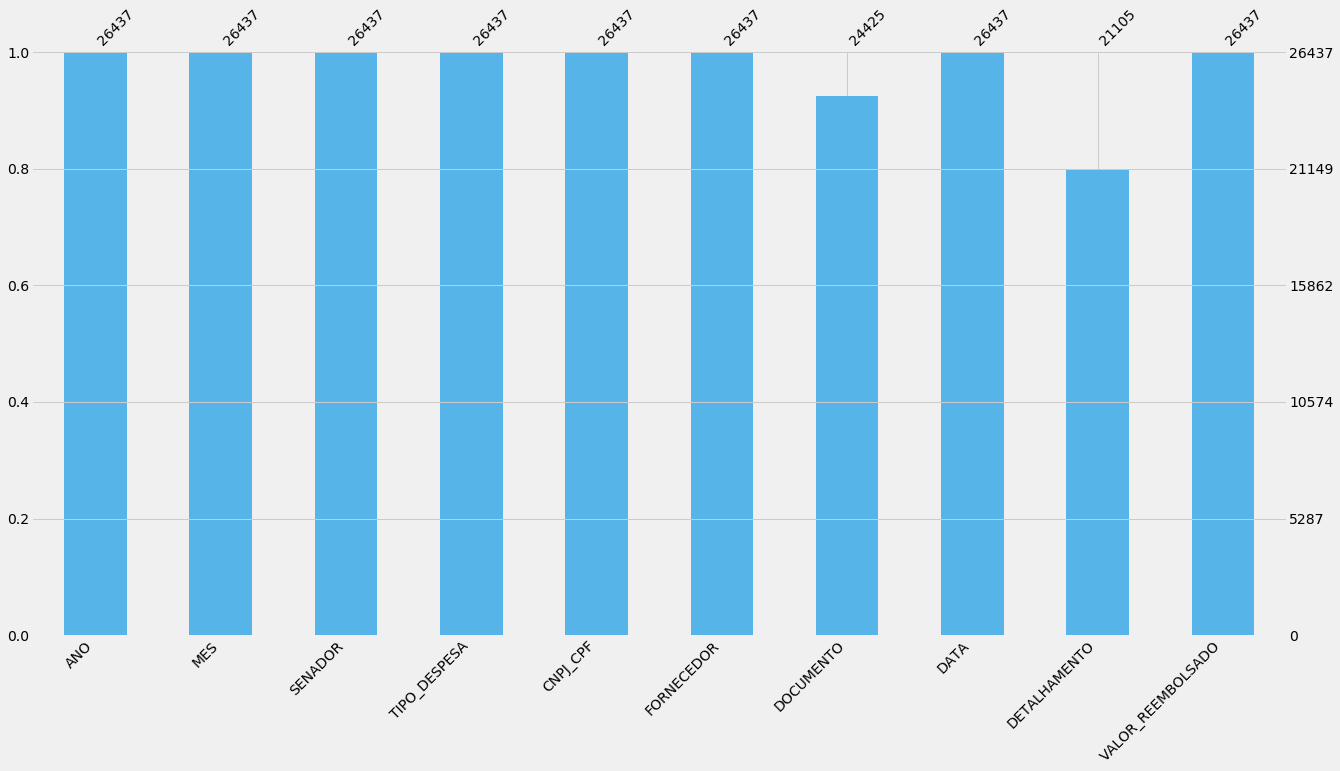

In [101]:
# show missing by columns

msno.bar(df,figsize=(20,10),color=default_color,fontsize=14,labels=True)

#### Collumn graphic
Help know distribuition of missing values by collumns

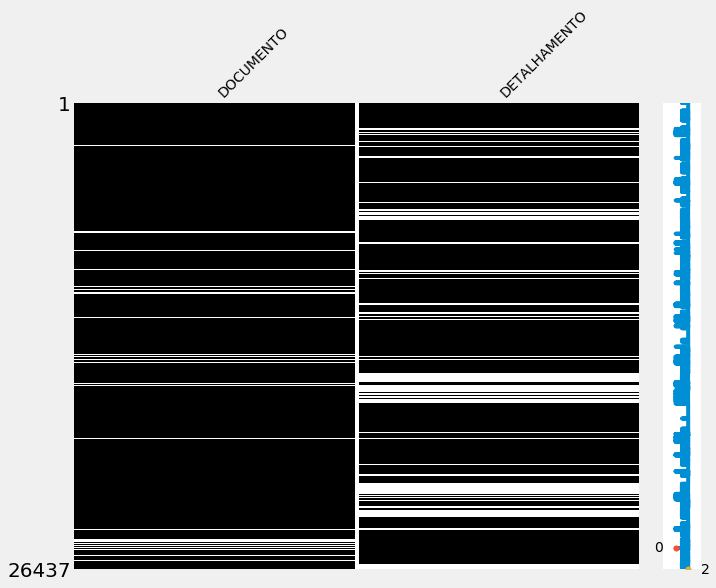

In [102]:
sorted_data = msno.nullity_sort(df_null)

msno.matrix(sorted_data,
            color=None,
            figsize=(10,8),
            fontsize=14)

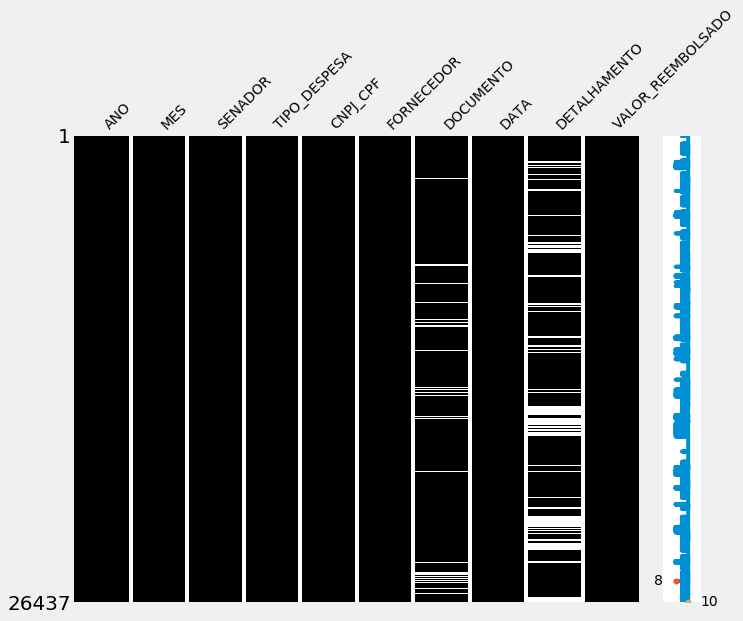

In [103]:
sorted_data = msno.nullity_sort(df)
msno.matrix(sorted_data,
            color=None,
            figsize=(10,8),
            fontsize=14)

#### Nota:
- _missing values_ são provindos da **falta de preenchimento**.
- Há poucos dados faltando, cerca de 2.7 %, por isso será utilizado a técnica de preencher com -1 os valores _missing_.

In [104]:
# Preenche (fill) todos os missing values com (-1) para valores numéricos
# e ('missing') para valores categóricos 
df.fillna('MISSING', inplace=True)

In [105]:
df.head(50)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,2016-01-13,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,1,Aluguel,05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,2016-01-18,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,1,Aluguel,004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,2016-04-01,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,1,Aluguel,05.423.963/0001-11,OI MÓVEL S.A.,661639001,2016-01-16,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,1,Despesas gerais,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,2016-06-01,Aquisição de publicação virtual de conteúdo jo...,550.00
5,2016,1,1,Contratações,22.787.742/0001-41,RONDOINFO DIST. DE PROD. DE INFORMATICA LTDA EPP,312,2016-01-13,MISSING,40.00
6,2016,1,1,"Locomoção, hospedagem e alimentação",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570293,2016-01-19,Despesa com aquisição de combustível para abas...,1218.76
7,2016,1,1,"Locomoção, hospedagem e alimentação",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570326,2016-01-19,Despesa com aquisição de combustível para abas...,1761.34
8,2016,1,1,"Locomoção, hospedagem e alimentação",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570688,2016-01-21,Despesa com aquisição de combustível para abas...,451.18
9,2016,1,1,"Locomoção, hospedagem e alimentação",34.274.233/0097-46,PETROBRAS DISTRIBUIDORA,000570743,2016-01-21,Despesa com aquisição de combustível para abas...,923.30


### Check duplicate values

In [106]:
# Check dataframe
values_duplicated = df.duplicated().sum()
print('Dataframe contains {} lines duplicated.\n'.format(values_duplicated))

Dataframe contains 0 lines duplicated.



### Check unique values

In [107]:
values_unique = df.nunique()
print(values_unique)

ANO                      1
MES                     12
SENADOR                 93
TIPO_DESPESA             7
CNPJ_CPF              3847
FORNECEDOR            4303
DOCUMENTO            22340
DATA                   366
DETALHAMENTO         12152
VALOR_REEMBOLSADO    14014
dtype: int64


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26437 entries, 0 to 26687
Data columns (total 10 columns):
ANO                  26437 non-null int64
MES                  26437 non-null int64
SENADOR              26437 non-null int64
TIPO_DESPESA         26437 non-null object
CNPJ_CPF             26437 non-null object
FORNECEDOR           26437 non-null object
DOCUMENTO            26437 non-null object
DATA                 26437 non-null datetime64[ns]
DETALHAMENTO         26437 non-null object
VALOR_REEMBOLSADO    26437 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 2.2+ MB


Parece fazer sentido estes valores. Então se dará por concluido a parte de _data cleaning and data analisys_.

### Save Data clean


In [109]:
df.to_csv('data/dados_limpos_ceaps_processed.csv', 
          index=False, 
          sep=',', 
          encoding='utf-8')

print('Dados salvos em dados_limpos_ceaps_processed.csv')

Dados salvos em dados_limpos_ceaps_processed.csv
